In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
acc_score = od()

In [2]:
def get_entropy_from_culling_factor_v2(c):
    S = od()
    sn = 0
    for E in c:
        S[E] = np.log(c[E])
        S[E] += sn
        sn += np.log(1 - c[E])
    return S

def get_DOS_from_entropy(S, N):
    g = od()
    Z = 0
    for E, s in S.items():
        t = s
        if E <= -N and E % 2 == 0 and E >= -2*N + 4:
            g[E] = t
    timex = g[-N]
    for E in g:
        g[E] -= timex
    return g

def get_DOS(N):
    DOS = od()
    E = 0
    with open("2DIsing_DOS_L40.txt", "r") as f:
        for line in f:
            if E <= -N and E % 2 == 0 and E != -2*N+2:
                DOS[E] = float(line)
            E-=2
        timex = DOS[-N]
        for E in DOS:
            DOS[E] -= timex
    return DOS

In [145]:
for N in [1600]:
    for R in [4194304]:
        for seed in [1]:#, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
            for nSteps in [50]:
                name = "./datasets/2DIsing/2DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
                culling_factor = od()
                culling_factor[1] = 0
                culling_factor[0] = 0
                print(name)
                with open(name) as f:
                    for line in f:
                        E, c = map(float, line.split())
                        culling_factor[E] = c

                #culling_factor[-400] = 1.0
                DOS = get_DOS(N)
                S = get_entropy_from_culling_factor_v2(culling_factor)
                g = get_DOS_from_entropy(S, N)



./datasets/2DIsing/2DIsing_N1600_R4194304_nSteps50_run1X.txt


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


<Figure size 1152x648 with 0 Axes>

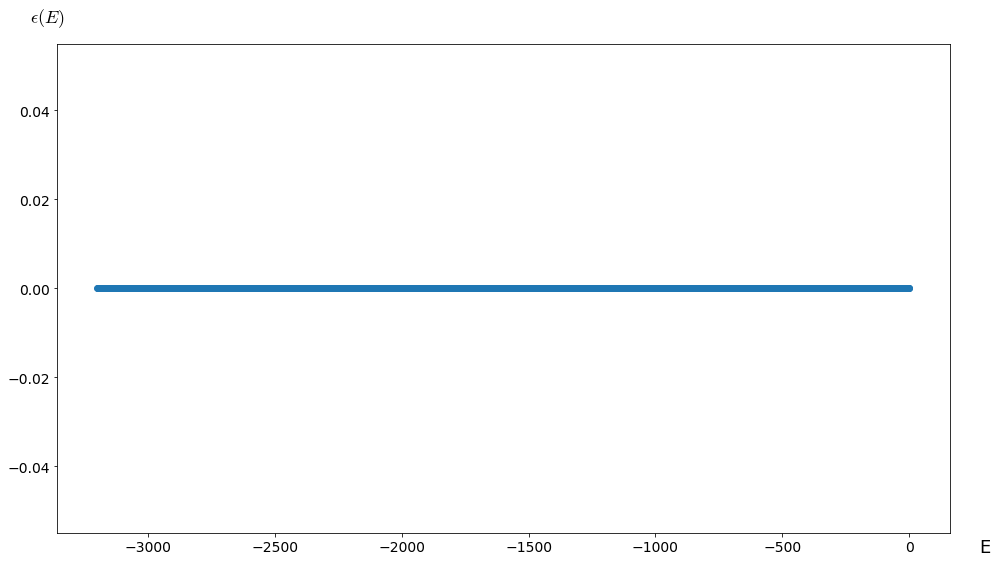

In [146]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 9))
threshold = -200
plt.rcParams["mathtext.fontset"] = "cm"
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_label_coords(-0.01, 1.03)
ax.xaxis.set_label_coords(1.04, -0.01)

ax.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')

ax.set_ylabel(r"$\epsilon(E)$", rotation=0, fontsize=18)
ax.set_xlabel("E", fontsize=18)
fig.show()
#plt.yscale("log")
#ax.legend()
#plt.grid()0
#plt.show()
#fig.savefig("./images/culling_factor_N{}_R{}.png".format(N, R), bbox_inches='tight')

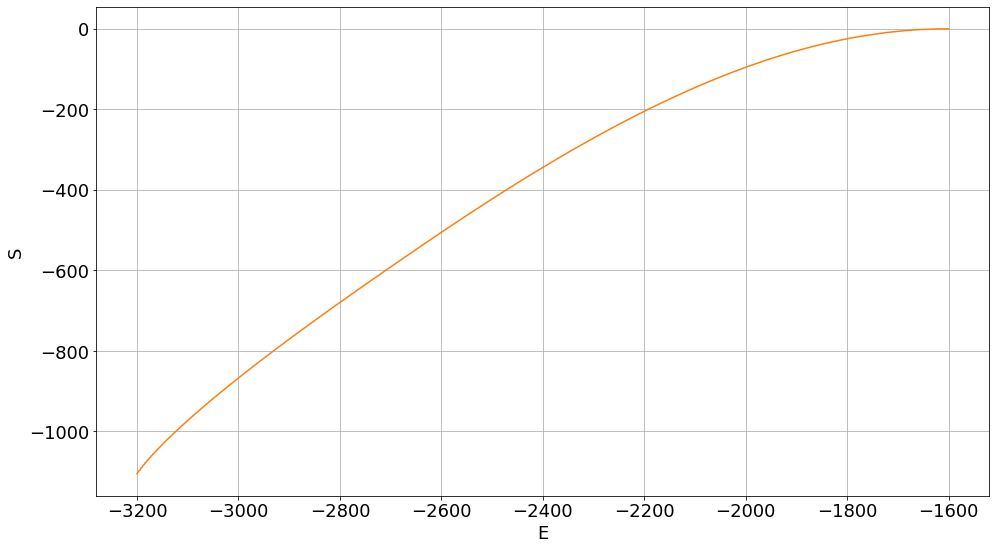

In [147]:
plt.figure(figsize=(16, 9))
#threshold = 1000
plt.rcParams.update({'font.size': 18})


plt.plot([E for E in g], [g[E] for E in g], 'o', label="recovered g(E)")
plt.plot([E for E in DOS], [DOS[E] for E in DOS], label="normed C(N, k)".format(N))


plt.xlabel("E")
plt.ylabel("S")
plt.grid()
plt.show()
#print("./images/recovered_DOS_N{}_R{}.png".format(N, R))
#plt.savefig("./images/recovered_DOS_N{}_R{}.png".format(N, R))

R movement

In [4]:
from itertools import groupby

In [5]:
acc_score_plus = od()
acc_score_minus = od()
acc_score = od()
acc = od()
last_point = od()
N = 1600
for nSteps in [1, 2, 5, 10, 30, 50]:
    for seed in range(10):
        for R in [1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]: 
            name = "./datasets/2DIsing/2DIsing_N{}_R{}_nSteps{}_run{}X.txt".format(N, R, nSteps, seed)
            culling_factor = od()
            culling_factor[1] = 0
            culling_factor[0] = 0
            with open(name) as f:
                for line in f:
                    E, c = map(float, line.split())
                    culling_factor[E] = c
            #culling_factor[-400] = 1.0
            #print(N, R, nSteps, seed)
            DOS = get_DOS(N)

            S = get_entropy_from_culling_factor_v2(culling_factor)
            g = get_DOS_from_entropy(S, N)

            acc_score[(R, seed, nSteps)] = sum([abs( g[E] - DOS[E] ) for E in g])
            last_point[(R, seed, nSteps)] = -N in g and not np.isnan(g[-N])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


C:\Users\marvelouslim\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


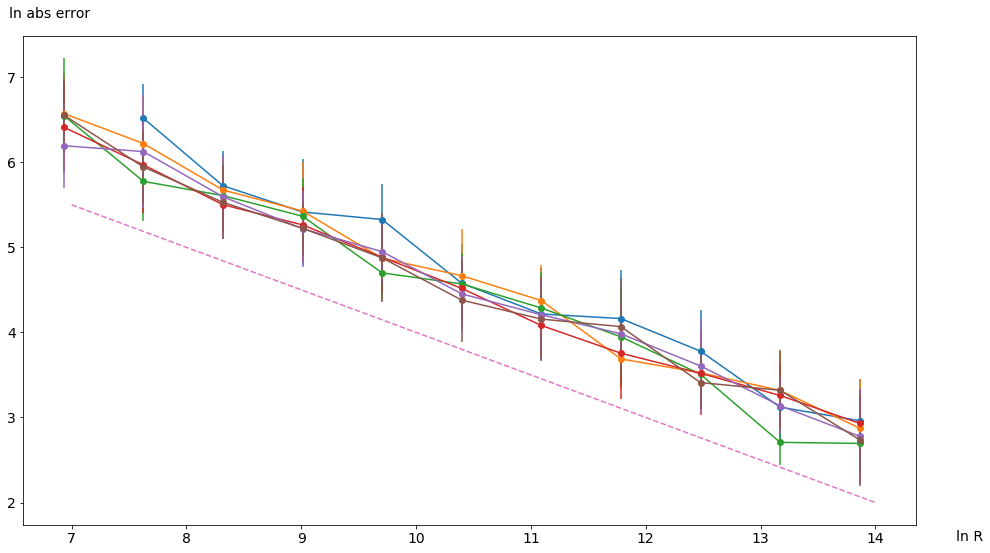

In [6]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.06, -0.01)

sort_f = lambda x: (x[2], x[0]);
plt.rcParams.update({'font.size': 18})
plt.rcParams["mathtext.fontset"] = "cm"

for z in [1, 2, 5, 10, 30, 50]:
    x, y, ye = [], [], []
    acc_score_keys_list = sorted(acc_score, key=sort_f)
    for key, group in groupby(acc_score_keys_list, key=sort_f):
        nSteps, R = key
        if nSteps != z: continue;
        #print(nSteps, R)
        acc = [acc_score[x] for x in group]
        #print([acc_score[x] for x in group])
        #plt.hist([acc_score[x] for x in group], bins=3)
        x.append(R)
        y.append(np.mean(acc))
        ye.append(np.std(acc))

    ax.errorbar(np.log(x), np.log(y), np.array(ye) / y, fmt='-o', label="nSteps={}".format(z))

r = [np.exp(7), np.exp(14)]
ax.plot(np.log(r), np.log([np.exp(9)/np.sqrt(y) for y in r]), '--', label="$1/\sqrt{R}$")

#ax.title("1D Ising Machta accuracy")
#ax.legend()
ax.set_ylabel("ln abs error", rotation=0)
ax.set_xlabel("ln R")
#plt.xscale("log")
#plt.yscale("log")
#plt.grid()
#plt.show()
#fig.show()
fig.savefig("./images/2DisingMachtaAccuracy.png", bbox_inches='tight')